<a href="https://colab.research.google.com/github/vantung20146105/midterm/blob/main/Recognition_Face.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:


from os import listdir
from numpy import asarray, save
from keras.utils import load_img
from keras.utils import img_to_array
import numpy as np
from sklearn.model_selection import train_test_split
from keras.datasets import cifar100
import matplotlib.pyplot as plt
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Normalization
from keras.models import Sequential, Model
from keras import Input
from keras.layers import LeakyReLU
from keras.optimizers import Adam

In [26]:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:


from numpy import asarray

folder = '/content/drive/MyDrive/Recogniton_face/Train_Ai_Image-Resized/Train_Ai_Image-Resized/Data/'
photos, labels = list(), list()
for file in listdir(folder):
  output = 0.0
  if file.startswith('Tung 1'):
    output = 0
  if file.startswith('Binh 1'):
    output = 1
  if file.startswith('Dangkhoa 1'):
    output = 2
  if file.startswith('Dat 1'):
    output = 3
  if file.startswith('Dung 1'):
    output = 4
  if file.startswith('Ha 1'):
    output = 5
  if file.startswith('Hau 1'):
    output = 6
  if file.startswith('Hieu 1'):
    output = 7
  if file.startswith('Hoaiphong 1'):
    output = 8
  if file.startswith('Hoang 1'):
    output = 9
  if file.startswith('Huy 1'):
    output = 10
  if file.startswith('Kyanh 1'):
    output = 11
  if file.startswith('Loc 1'):
    output = 12
  if file.startswith('Long 1'):
    output = 13
  if file.startswith('Luan 1'):
    output = 14
  if file.startswith('Minh 1'):
    output = 15
  if file.startswith('Ngocthach 1'):
    output = 16
  if file.startswith('Nhathuy 1'):
    output = 17
  if file.startswith('Phat 1'):
    output = 18
  if file.startswith('Phuc 1'):
    output = 19
  if file.startswith('Quanghuy 1'):
    output = 20
  if file.startswith('Quangphuc 1'):
    output = 21
  if file.startswith('Sang 1'):
    output = 22
  if file.startswith('Thai 1'):
    output = 23
 
  photo = load_img(folder + file, target_size=(40, 40))
  photo = img_to_array(photo)
  photos.append(photo)
  labels.append(output)

photos = asarray(photos)
labels = asarray(labels)
print(photos.shape, labels.shape)
save('/content/drive/MyDrive/Recogniton_face/Train_Ai_Image-Resized/Face_labels.npy', photos)
save('/content/drive/MyDrive/Recogniton_face/Train_Ai_Image-Resized/Face_photos.npy', labels)

(1446, 40, 40, 3) (1446,)


In [4]:
# Load images and labels
from keras.utils import to_categorical #one hot encoding
photos = np.load('/content/drive/MyDrive/Recogniton_face/Train_Ai_Image-Resized/Face_labels.npy')
labels = np.load('/content/drive/MyDrive/Recogniton_face/Train_Ai_Image-Resized/Face_photos.npy')
labels_one_hot = to_categorical(labels)
x_train, x_test, y_train, y_test = train_test_split(photos, labels_one_hot, test_size = 0.3, random_state = 100)

In [5]:
model = Sequential()
#Convolutional
model.add(Conv2D(32, kernel_size= (3,3), activation= 'relu', input_shape = (40,40,3), padding= 'same'))
model.add(MaxPooling2D((2,2), padding= 'same'))

model.add(Conv2D(64, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(MaxPooling2D((2,2), padding= 'same'))

model.add(Conv2D(64, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(Conv2D(64, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(MaxPooling2D((2,2), padding= 'same'))

model.add(Conv2D(128, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(Conv2D(128, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(MaxPooling2D((2,2), padding= 'same'))

# Fully connected layers
model.add(Flatten())
model.add(Dense(1024, activation= 'relu'))
model.add(Dropout(0.5))
model.add(Dense(1024, activation= 'relu'))
model.add(Dropout(0.5))
model.add(Dense(24, activation= 'softmax'))
model.compile(loss='categorical_crossentropy', optimizer = Adam(), metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 40, 40, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 20, 20, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 20, 20, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 64)        36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 64)        3

In [6]:

#Tang cuong data
from keras.preprocessing.image import ImageDataGenerator
aug = ImageDataGenerator(rotation_range=20, zoom_range=0.1,
    rescale=1./255,
	width_shift_range=0.1,
    height_shift_range=0.1,
	horizontal_flip=True,
    brightness_range=[0.2,1.5], fill_mode="nearest")

In [7]:

train = model.fit_generator(aug.flow(x_train, y_train, batch_size=64),
                               epochs=100)

Epoch 1/100


<ipython-input-7-06eb12d74c93>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  train = model.fit_generator(aug.flow(x_train, y_train, batch_size=64),


16/16 [==============================] - 11s 71ms/step - loss: 1.6566 - accuracy: 0.7787
Epoch 2/100
16/16 [==============================] - 1s 60ms/step - loss: 1.1684 - accuracy: 0.8291
Epoch 3/100
16/16 [==============================] - 1s 60ms/step - loss: 1.0542 - accuracy: 0.8291
Epoch 4/100
16/16 [==============================] - 1s 60ms/step - loss: 1.0405 - accuracy: 0.8291
Epoch 5/100
16/16 [==============================] - 1s 61ms/step - loss: 1.0159 - accuracy: 0.8291
Epoch 6/100
16/16 [==============================] - 1s 61ms/step - loss: 1.0130 - accuracy: 0.8291
Epoch 7/100
16/16 [==============================] - 1s 63ms/step - loss: 1.0186 - accuracy: 0.8291
Epoch 8/100
16/16 [==============================] - 1s 61ms/step - loss: 1.0251 - accuracy: 0.8291
Epoch 9/100
16/16 [==============================] - 1s 59ms/step - loss: 1.0176 - accuracy: 0.8291
Epoch 10/100
16/16 [==============================] - 1s 86ms/step - loss: 1.0019 - accuracy: 0.8291
Epoch 11/1

In [8]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Accuracy:", test_acc)
print('Loss:', test_loss)
model.save('/content/drive/MyDrive/Face Recognition/Face.h5')

14/14 [==============================] - 1s 16ms/step - loss: 52.1528 - accuracy: 0.6382
Accuracy: 0.638248860836029
Loss: 52.15281295776367


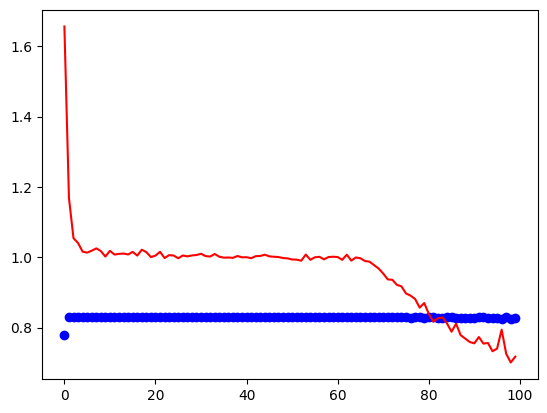

In [9]:
from matplotlib import pyplot as plt
accuracy= train.history['accuracy']
loss= train.history['loss']
epochs= range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label= 'Training accuracy')
plt.plot(epochs, loss, 'r', label= 'Training loss')
plt.show()


In [10]:
from keras.models import load_model
model = load_model('/content/drive/MyDrive/Face Recognition/Face.h5')

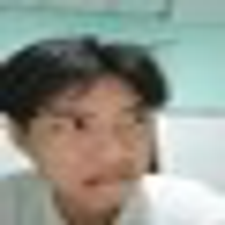

1/1 [==============================] - 0s 18ms/step
['Tung 1']


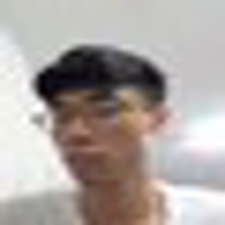

1/1 [==============================] - 0s 19ms/step
['Tung 1']


In [28]:
from PIL import Image
import numpy as np
import os

#Tạo mảng để chứa label
label = np.array(['Tung 1', 'Binh 1', 'Dangkhoa 1', 'Dat 1', 'Dung 1', 'Ha 1', 'Hau 1', 'Hieu 1', 'Hoaiphong 1', 'Hoang 1', 'Huy 1', 'Kyanh 1','Loc 1', 'Long 1', 'Luan 1', 'Minh 1'
, 'Ngocthach 1', 'Nhathuy 1', 'Phat 1', 'Phuc 1', 'Quanghuy 1', 'Quangphuc 1'
'Sang 1', 'Thai 1'])

# Kích thước mới của ảnh
new_size = (225, 225)
predict_size = (40, 40)

# Đường dẫn đến thư mục chứa ảnh trong Drive
path = '/content/drive/MyDrive/Recogniton_face/Train_Ai_Image-Resized/Train_Ai_Image-Resized/Check data/'
images = os.listdir(path)

# Đọc ảnh từ thư mục trên Drive và hiển thị chúng trên Colab
for image_name in images:
    # Đường dẫn đến file ảnh
    img_path = os.path.join(path, image_name)
    # Đọc ảnh
    if os.path.isfile(img_path):
      # Đọc ảnh
      img = Image.open(img_path)
      img_origin = Image.open(img_path)

      # Resize ảnh về kích thước mới
      img_origin = img.resize(new_size)
      img_origin.show()

      #Dự đoán
      img = img.resize(predict_size)
      img = img_to_array(img)
      img = img.reshape(1,40,40,3)
      img = img.astype('float32')/255
      max = np.argmax(model.predict(img), axis = 1)
      print(label[max])